In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        (os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Processing image: /kaggle/input/yolo-format-oral-diseases/Data/images/train/559.jpg


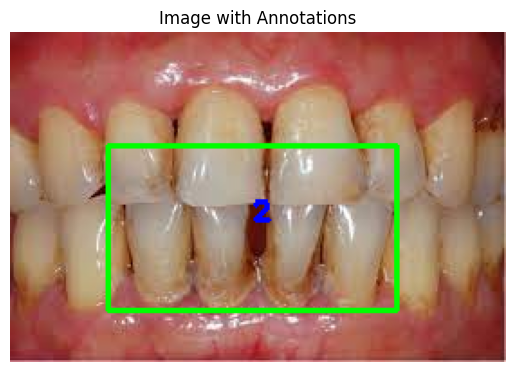

Processing image: /kaggle/input/yolo-format-oral-diseases/Data/images/train/caries_0_4508.jpg
Error loading image: /kaggle/input/yolo-format-oral-diseases/Data/images/train/caries_0_4508.jpg
Processing image: /kaggle/input/yolo-format-oral-diseases/Data/images/train/(174).jpg


[ WARN:0@0.531] global loadsave.cpp:248 findDecoder imread_('/kaggle/input/yolo-format-oral-diseases/Data/images/train/caries_0_4508.jpg'): can't open/read file: check file path/integrity


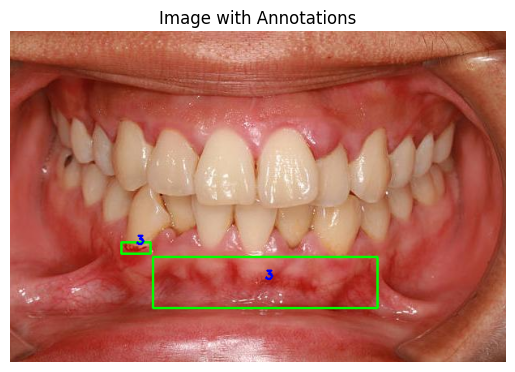

Processing image: /kaggle/input/yolo-format-oral-diseases/Data/images/train/557.jpg


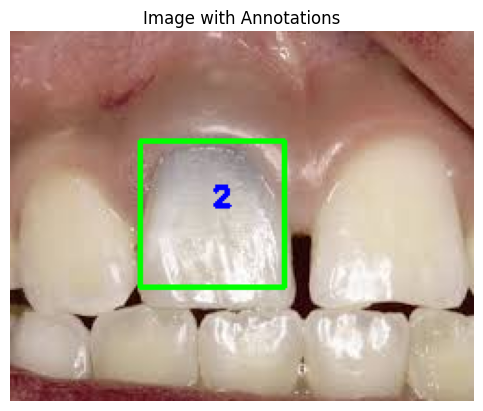

Processing image: /kaggle/input/yolo-format-oral-diseases/Data/images/train/361.jpg


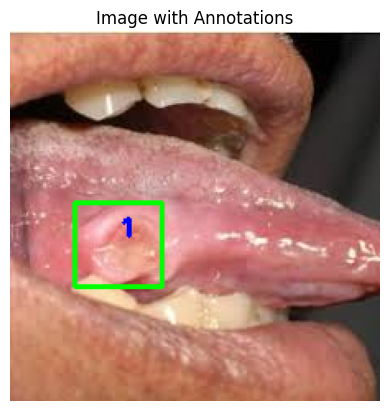

Processing image: /kaggle/input/yolo-format-oral-diseases/Data/images/train/40.jpg


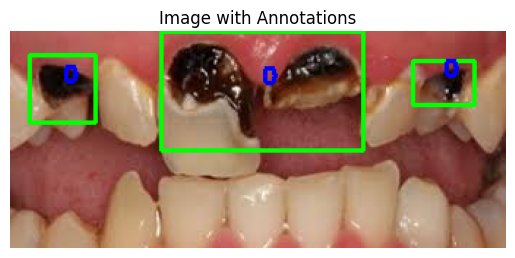

Processing image: /kaggle/input/yolo-format-oral-diseases/Data/images/train/245.jpg


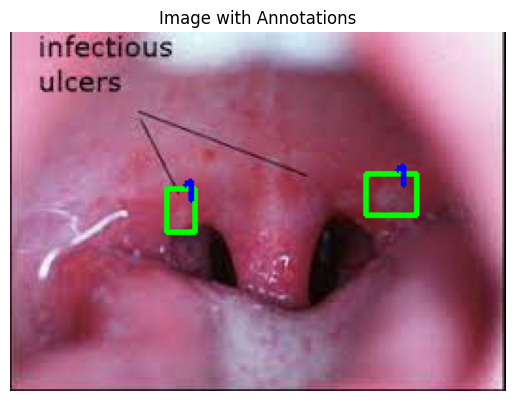

Processing image: /kaggle/input/yolo-format-oral-diseases/Data/images/train/caries_0_4238.jpg
Error loading image: /kaggle/input/yolo-format-oral-diseases/Data/images/train/caries_0_4238.jpg
Processing image: /kaggle/input/yolo-format-oral-diseases/Data/images/train/(87).jpg


[ WARN:0@2.131] global loadsave.cpp:248 findDecoder imread_('/kaggle/input/yolo-format-oral-diseases/Data/images/train/caries_0_4238.jpg'): can't open/read file: check file path/integrity


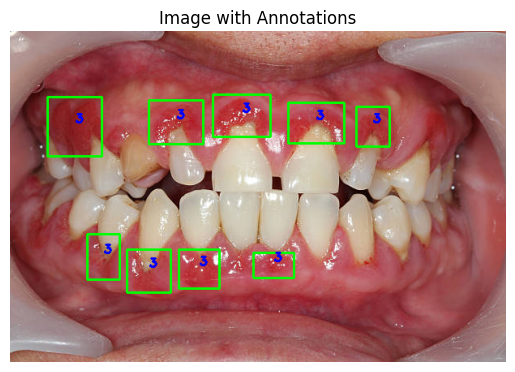

Processing image: /kaggle/input/yolo-format-oral-diseases/Data/images/train/431.jpg


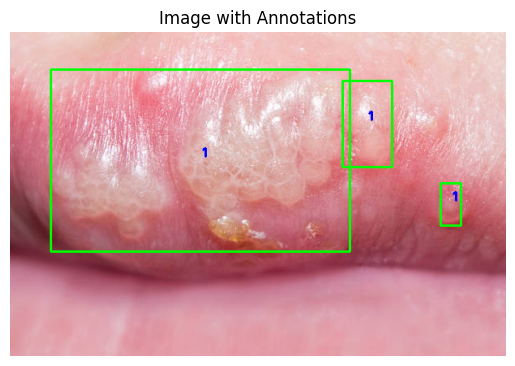

Processing image: /kaggle/input/yolo-format-oral-diseases/Data/images/val/372.jpg


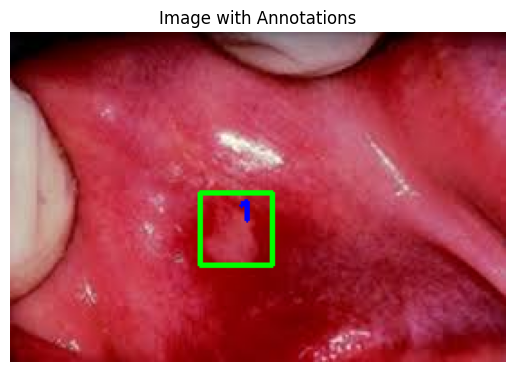

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
from collections import defaultdict

def load_annotations(annotation_path):
    with open(annotation_path, 'r') as file:
        lines = file.readlines()
    
    annotations = []
    for line in lines:
        parts = line.strip().split()
        class_id = int(parts[0])
        center_x, center_y, width, height = map(float, parts[1:])
        annotations.append({'class_id': class_id, 'bbox': [center_x, center_y, width, height]})
    
    return annotations

def visualize_image(image_path, annotations):
    image = cv2.imread(image_path)

    if image is None:
        print(f"Error loading image: {image_path}")
        return
    
    for annotation in annotations:
        x, y, w, h = annotation['bbox']
        class_id = annotation['class_id']
        
        cv2.rectangle(image, (int((x - w / 2) * image.shape[1]), int((y - h / 2) * image.shape[0])),
                      (int((x + w / 2) * image.shape[1]), int((y + h / 2) * image.shape[0])), (0, 255, 0), 2)
        cv2.putText(image, str(class_id), (int(x * image.shape[1]), int(y * image.shape[0]) - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Image with Annotations')
    plt.axis('off')
    plt.show()

def analyze_dataset(dataset_path, num_images=100):
    class_distribution = defaultdict(int)
    
    image_count = 0
    
    for split in ['train', 'val']:
        for root, dirs, files in os.walk(os.path.join(dataset_path, 'labels', split)):
            for file in files:
                if file.endswith('.txt'):
                    annotation_path = os.path.join(root, file)
                    image_path = os.path.join(dataset_path, 'images', split, os.path.splitext(file)[0] + '.jpg')
                    
                    print(f"Processing image: {image_path}")
                    
                    annotations = load_annotations(annotation_path)
                    visualize_image(image_path, annotations)
                    
                    for annotation in annotations:
                        class_id = annotation['class_id']
                        class_distribution[class_id] += 1
                    
                    image_count += 1
                    if image_count >= num_images:
                        break
                    
                if image_count >= num_images:
                    break

dataset_path = "/kaggle/input/yolo-format-oral-diseases/Data"
analyze_dataset(dataset_path, num_images=10)


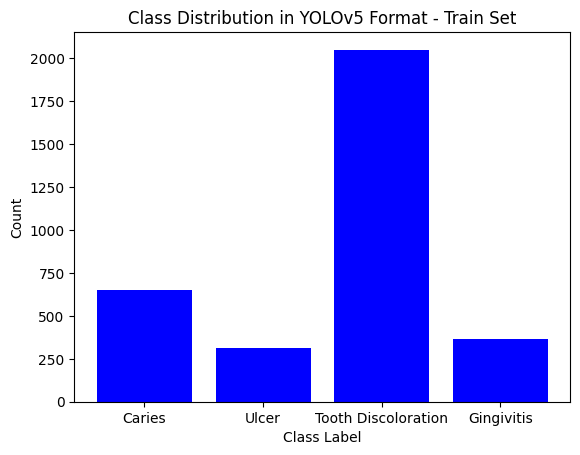

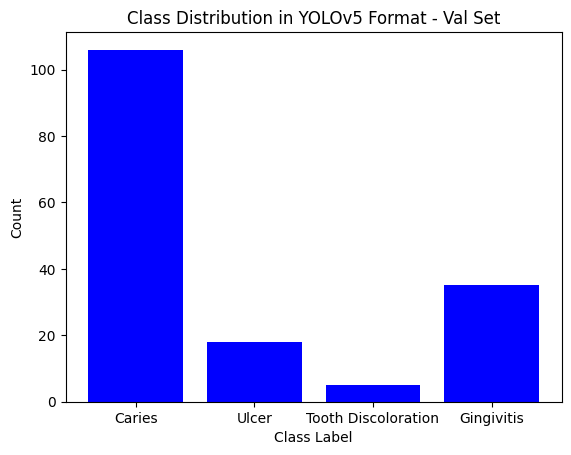

In [3]:
import os
import matplotlib.pyplot as plt

def load_annotations(data_dir, split='train'):
    annotations = []

    labels_dir = os.path.join(data_dir, 'labels', split)
    image_files = os.listdir(os.path.join(data_dir, 'images', split))

    for image_file in image_files:
        image_id, _ = os.path.splitext(image_file)
        label_path = os.path.join(labels_dir, f'{image_id}.txt')

        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                lines = f.readlines()

            annotations.append({
                'image_id': image_id,
                'annotations': [
                    {'class': line.split()[0]} for line in lines
                ]
            })

    return annotations

def visualize_class_distribution(data_dir, split='train'):
    annotations = load_annotations(data_dir, split)

    # Extract class labels from annotations
    class_labels = []
    for annotation in annotations:
        for bbox in annotation['annotations']:
            class_labels.append(bbox['class'])

    # Count occurrences of each class
    class_counts = {}
    for class_label in class_labels:
        class_counts[class_label] = class_counts.get(class_label, 0) + 1

    # Plotting the distribution
    classes = list(class_counts.keys())
    counts = list(class_counts.values())
    name_classes=[ 'Caries','Ulcer', 'Tooth Discoloration','Gingivitis']
    plt.bar(name_classes, counts, color='blue')
    plt.xlabel('Class Label')
    plt.ylabel('Count')
    plt.title(f'Class Distribution in YOLOv5 Format - {split.capitalize()} Set')
    plt.show()

data_directory = '/kaggle/input/yolo-format-oral-diseases/Data'
visualize_class_distribution(data_directory, split='train')
visualize_class_distribution(data_directory, split='val')
